# Análisis de Series Temporales con Pronóstico y Rangos de Control

Este notebook muestra cómo analizar una serie temporal, calcular intervalos de confianza, aplicar un modelo de pronóstico simple, y graficar rangos de control.


In [1]:
# 1. Librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
# Configuración de estilo para los gráficos
sns.set(style="whitegrid")

## Crear una serie temporal sintética
Simulamos una serie mensual con tendencia, estacionalidad y ruido.

In [4]:
np.random.seed(42)
periods = 60
t = pd.date_range(start="2020-01-01", periods=periods, freq="ME")
trend = np.linspace(10, 20, periods)
seasonality = 2 * np.sin(np.linspace(0, 3 * np.pi, periods))
noise = np.random.normal(0, 1.5, periods)
data = trend + seasonality + noise
df = pd.DataFrame({"date": t, "value": data}).set_index("date")

## Calcular intervalo de confianza (95%)
Se usa la media móvil y la desviación estándar para estimar un intervalo de confianza del 95%.

In [5]:
rolling_mean = df['value'].rolling(window=12).mean()
rolling_std = df['value'].rolling(window=12).std()
ci_upper = rolling_mean + 1.96 * rolling_std
ci_lower = rolling_mean - 1.96 * rolling_std

## Gráfico de la serie con intervalos de confianza
Visualizamos la serie original, la media móvil y el intervalo de confianza.

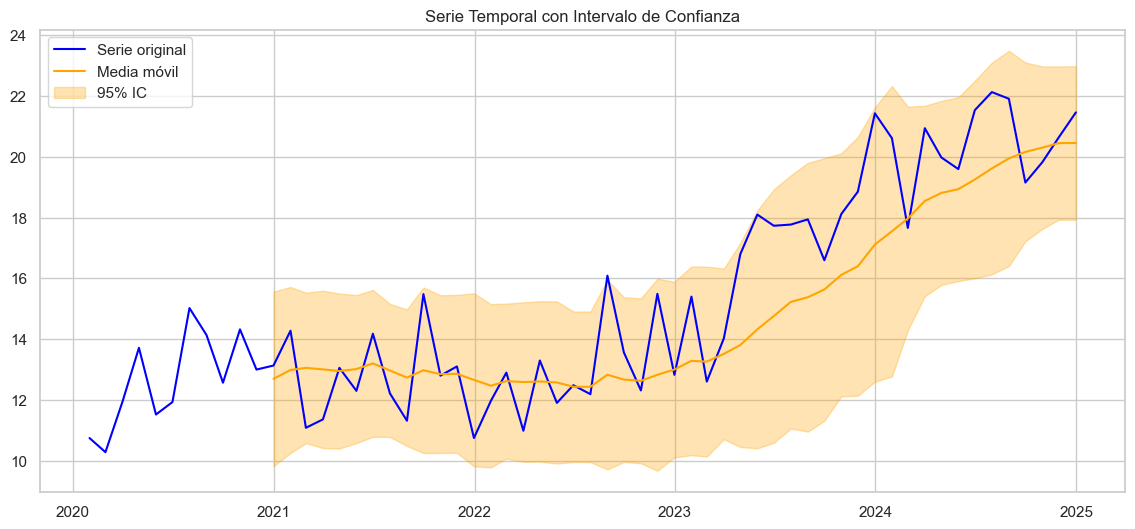

In [6]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['value'], label="Serie original", color="blue")
plt.plot(df.index, rolling_mean, label="Media móvil", color="orange")
plt.fill_between(df.index, ci_lower, ci_upper, color="orange", alpha=0.3, label="95% IC")
plt.title("Serie Temporal con Intervalo de Confianza")
plt.legend()
plt.show()

## Modelo de pronóstico Holt-Winters
Utilizamos el modelo Holt-Winters con componentes aditivos para tendencia y estacionalidad.

In [7]:
model = ExponentialSmoothing(df['value'], trend="add", seasonal="add", seasonal_periods=12)
fitted_model = model.fit()
forecast = fitted_model.forecast(steps=12)

/opt/anaconda3/envs/PantaleonDS/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


## Calcular rangos de control sobre el pronóstico
Los rangos de control se estiman como el pronóstico ± 2 desviaciones estándar de los residuos.

In [8]:
residuals = df['value'] - fitted_model.fittedvalues
error_std = residuals.std()
forecast_upper = forecast + 2 * error_std
forecast_lower = forecast - 2 * error_std

## Gráfico del pronóstico con rangos de control
Visualizamos el pronóstico y los límites de control para evaluar variabilidad esperada.

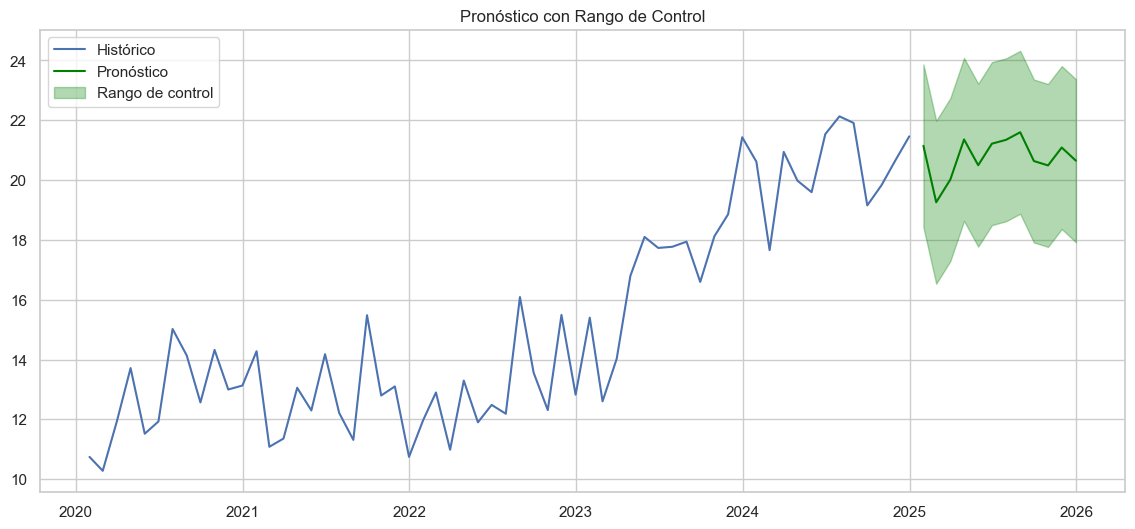

In [9]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['value'], label="Histórico")
plt.plot(forecast.index, forecast, label="Pronóstico", color="green")
plt.fill_between(forecast.index, forecast_lower, forecast_upper, color="green", alpha=0.3, label="Rango de control")
plt.title("Pronóstico con Rango de Control")
plt.legend()
plt.show()